In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('customer_churn_data.csv')


In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [7]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [8]:
df.shape

(1000, 10)

In [9]:
#full the null value
df['InternetService'] = df['InternetService'].fillna("None")

In [10]:
df.head(10)


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,None,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,None,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_columns = df.select_dtypes(include =["number"])

In [13]:
numeric_columns.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [14]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
None           297
Name: count, dtype: int64

In [15]:
df["Churn"].value_counts(normalize=True)


Churn
Yes    0.883
No     0.117
Name: proportion, dtype: float64

# Exploratory Data Analysis

<Axes: xlabel='ContractType', ylabel='count'>

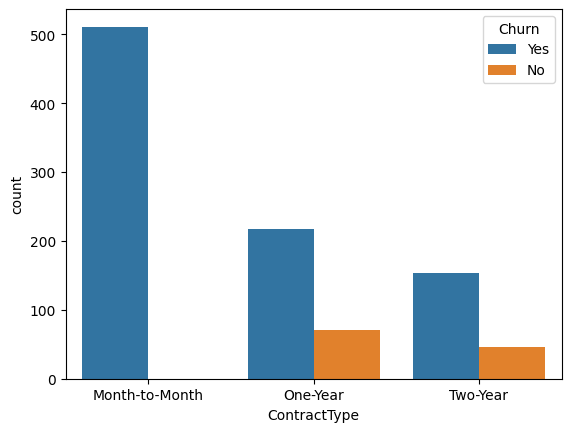

In [16]:
#tenure vs customer churn
sns.countplot(x='ContractType',hue='Churn',data=df)

<Axes: xlabel='InternetService', ylabel='count'>

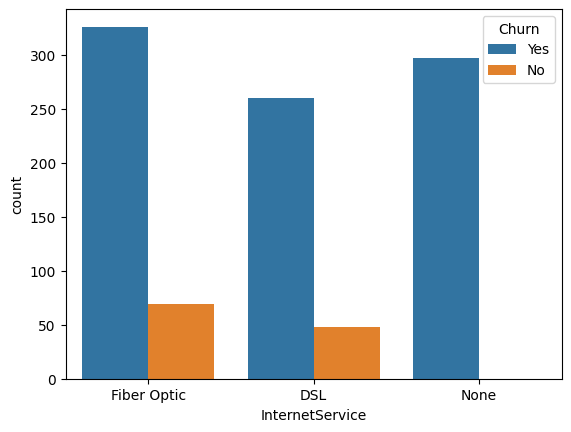

In [17]:
sns.countplot(x='InternetService',hue='Churn', data=df)

In [18]:
df.groupby("ContractType")["Churn"].value_counts(normalize=True)


ContractType    Churn
Month-to-Month  Yes      1.000000
One-Year        Yes      0.754325
                No       0.245675
Two-Year        Yes      0.770000
                No       0.230000
Name: proportion, dtype: float64

In [19]:
pd.crosstab(df["Gender"], df["Churn"], normalize="index")


Churn,No,Yes
Gender,,
Female,0.126394,0.873606
Male,0.106061,0.893939


In [20]:
pd.crosstab(df["TechSupport"], df["Churn"], normalize="index")


Churn,No,Yes
TechSupport,,
No,0.000000,1.000000
Yes,0.231225,0.768775


In [21]:
#numerical features vs churn
df.groupby("Churn")[["Age", "Tenure", "MonthlyCharges", "TotalCharges"]].mean()

,Age,Tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,43.487179,30.264957,62.54641,1842.510256
Yes,44.831257,17.476784,75.96077,1346.308448


<Axes: xlabel='Churn', ylabel='Tenure'>

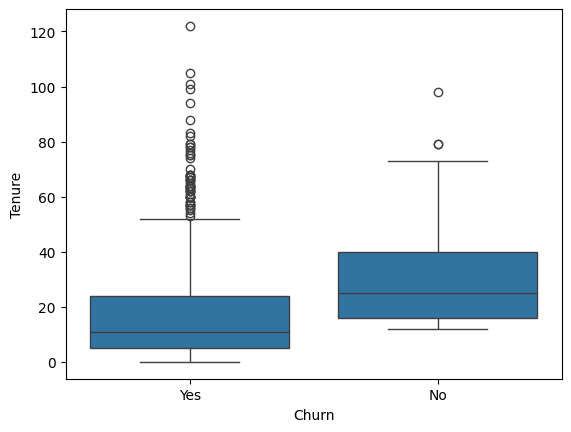

In [22]:
sns.boxplot(x="Churn", y="Tenure", data=df)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

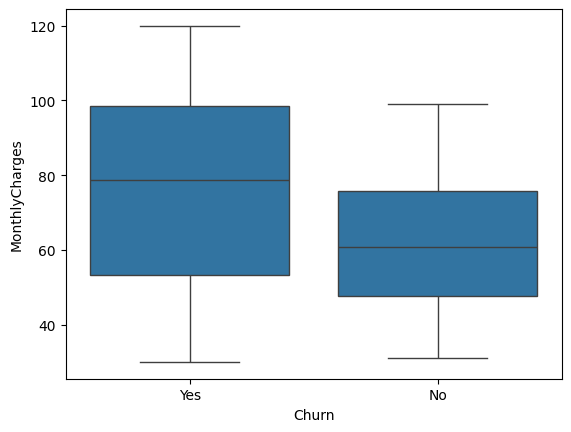

In [23]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

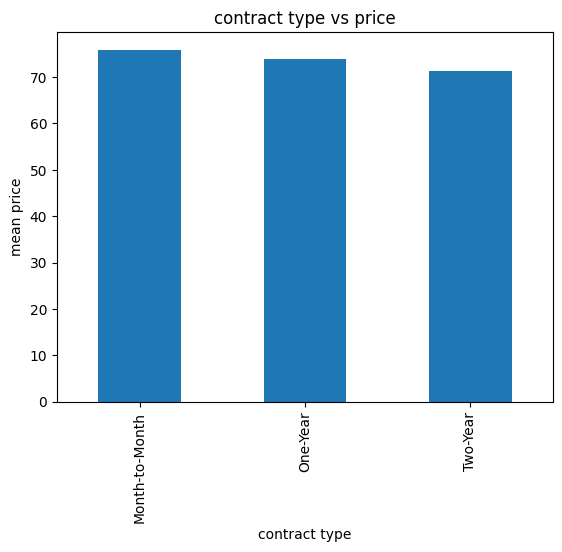

In [24]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("mean price")
plt.xlabel("contract type")
plt.title("contract type vs price")
plt.show()

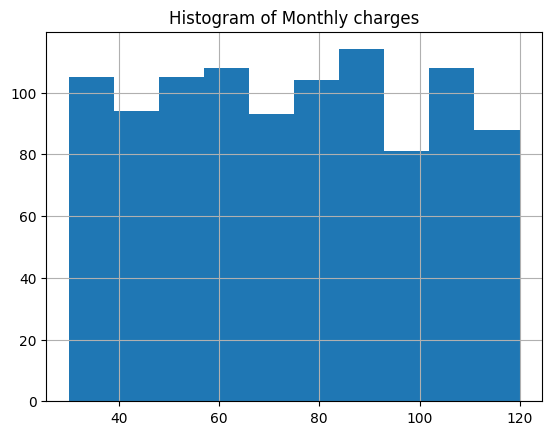

In [25]:
df['MonthlyCharges'].hist()
plt.title("Histogram of Monthly charges")
plt.show()

In [26]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

Splitting, Trainin and Testing the model

In [27]:
# Ensure encoding is applied before creating x
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['ContractType'] = df['ContractType'].map({'Month-to-Month': 0, 'One-Year': 1, 'Two-Year': 2})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})

y = df['Churn']
x = df[['Tenure','Age','Gender','MonthlyCharges','ContractType','TechSupport']]

In [28]:
x

,Tenure,Age,Gender,MonthlyCharges,ContractType,TechSupport
0,4,49,0,88.35,0,1
1,0,43,0,36.67,0,1
2,2,51,1,63.79,0,0
3,8,60,1,102.34,1,1
4,32,42,0,69.01,0,0
...,...,...,...,...,...,...
995,41,42,0,37.14,0,1
996,9,62,0,80.93,0,0
997,15,51,1,111.72,0,1
998,68,39,0,65.67,1,0


In [29]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [32]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
  print("accuracy score on model is {}".format(accuracy_score(y_test,prediction)))

In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
from sklearn.linear_model import LogisticRegression


logic_model = LogisticRegression()
logic_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_pred = logic_model.predict(x_test)

In [36]:
modelperformance(y_pred)

accuracy score on model is 0.925


In [37]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # Add solvers that support l1 penalty
}

In [38]:
gridn = GridSearchCV(logic_model, param_grid, cv=5)
gridn.fit(x_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [39]:
y_pred2 = gridn.predict(x_test)

In [40]:
modelperformance(y_pred2)

accuracy score on model is 0.925


In [41]:
from sklearn.svm import SVC
svm_model = SVC()

In [42]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf']
}

In [43]:
gridsvc = GridSearchCV(svm_model, param_grid, cv=5)
gridsvc.fit(x_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.001, 0.01, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [44]:
y_pred = gridsvc.predict(x_test)

In [45]:
gridsvc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [46]:
modelperformance(y_pred)

accuracy score on model is 0.99


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,3,4]
}

In [49]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)


In [50]:
grid_tree.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [51]:
y_pred = grid_tree.predict(x_test)

In [52]:
modelperformance(y_pred)

accuracy score on model is 1.0


In [53]:
best_model = grid_tree.best_estimator_

In [54]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [55]:
x.columns

Index(['Tenure', 'Age', 'Gender', 'MonthlyCharges', 'ContractType',
       'TechSupport'],
      dtype='object')